In [1]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import datetime
from datetime import timedelta
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (30, 15)
# mpl.rcParams['axes.grid'] = False

target="close"

In [2]:
def getDataset(full=False):
    url = "./datasets/DAT_ASCII_EURUSD_M1_2018.csv"
    df = pd.read_csv(url, names=list(["date","open", "high", "low", "close", "volume"]), header=None, sep=";")
    # df.drop(columns=['open', 'high', 'low'], inplace=True)
    pdlen=len(df)
    
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    # df.set_axis(df['date'], inplace=True)
    # df.drop(columns=["volume"], inplace=True)
    df.drop(columns=["volume", "low", "open", "high"], inplace=True)
    # df["Close"]= df["close"] # compatibility
    # df["Volume"]= df["volume"] # compatibility
    # df.drop(columns=['close'], inplace=True)
    # df["ewma_close"]=df["close"].ewm(4).mean()
    if full is False:
        df=df[58::60]
        
    return df

In [3]:
# def getDataset():
#     url = "./datasets/eurusd-m15-2018/EURUSD.csv"
#     df = pd.read_csv(url)
#     # df.drop("Volume", 1, inplace=True)
#     df["Date"] = df["Date"].astype(str) + " " + df["Timestamp"]
#     df['Date'] = pd.to_datetime(df['Date'])
#     # df.set_index("Date", inplace=True)
#     # df.drop("Date", 1, inplace=True)
#     df.drop("Timestamp", 1, inplace=True)
#     df.drop("Volume", 1, inplace=True)
#     # df.drop("Open", 1, inplace=True)
#     df=df.rename(columns={"Date": "date", "Close": "close", "Open": "open", "Low": "low", "Volume": "volume", "High": "high"})
#     # df.drop("High", 1, inplace=True)
#     # df.drop("Low", 1, inplace=True)
#     df=df[0::4]
#     return df

Text(0, 0.5, 'Wartość stosunku euro do dolara')

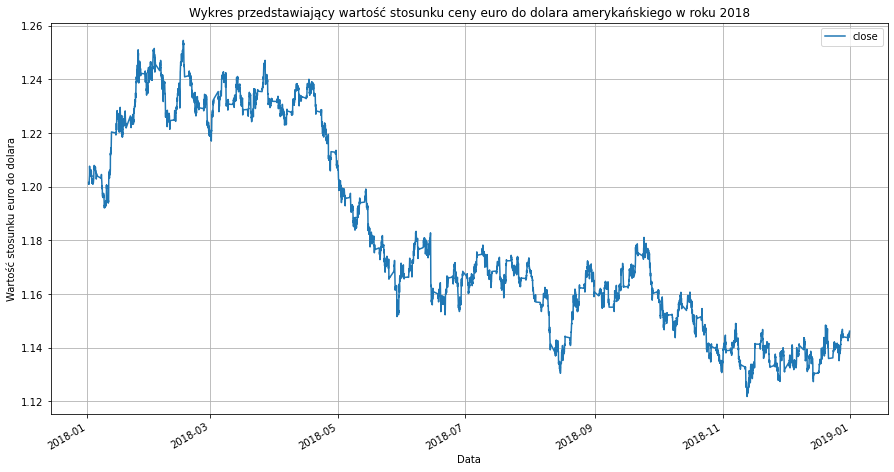

In [4]:
df = getDataset(full=False)

df.set_axis(df['date'])[target].plot(figsize=(15,8))
plt.legend(["close"])
plt.grid(True)
plt.title("Wykres przedstawiający wartość stosunku ceny euro do dolara amerykańskiego w roku 2018")
plt.xlabel("Data")
plt.ylabel("Wartość stosunku euro do dolara")

In [5]:
date_time = pd.to_datetime(df.pop('date'))
print(date_time)

58       2018-01-01 17:59:00
118      2018-01-01 18:59:00
178      2018-01-01 19:59:00
238      2018-01-01 20:59:00
298      2018-01-01 21:59:00
                 ...        
372358   2018-12-31 12:51:00
372418   2018-12-31 13:51:00
372478   2018-12-31 14:51:00
372538   2018-12-31 15:51:00
372598   2018-12-31 16:51:00
Name: date, Length: 6210, dtype: datetime64[ns]


In [6]:
df

close
58      1.20136
118     1.20107
178     1.20161
238     1.20154
298     1.20092
...         ...
372358  1.14462
372418  1.14454
372478  1.14529
372538  1.14596
372598  1.14617

[6210 rows x 1 columns]

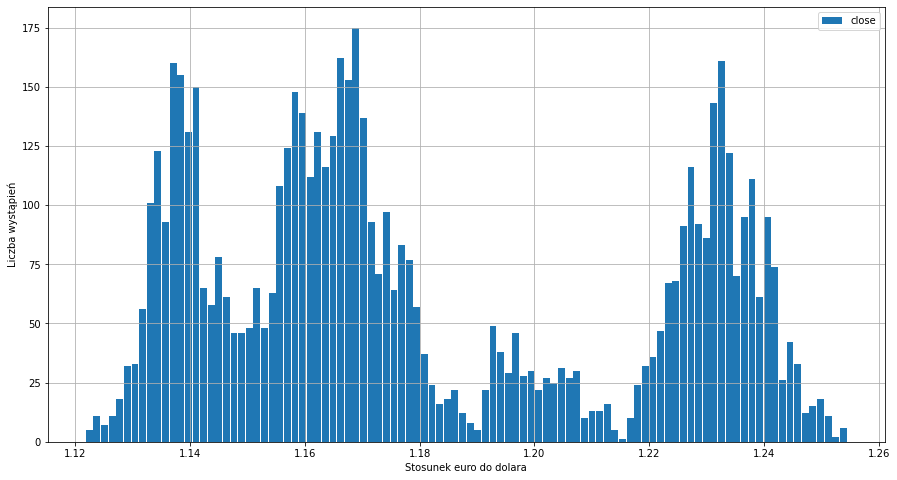

In [7]:
df[target].hist(bins=100, rwidth=0.9, figsize=(15,8))

plt.xlabel('Stosunek euro do dolara')
plt.ylabel('Liczba wystąpień')
# plt.title("Histogram wystąpień ")
plt.title("")
plt.legend(["close"])
plt.grid(True)

In [8]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

print(signaltonoise(df["close"]))    

32.03642281902627


In [9]:
# adjusted_date_time = []
# print([date_time.values[0]+timedelta(minutes=(i-1)*1) for i in range(len(date_time.values))])


date_time_clone = date_time.copy()
new_values=pd.date_range(date_time.values[0], periods=len(date_time), freq='1h')

i=0
for key in date_time_clone.copy().keys():
    date_time_clone[key]=new_values[i]
    i=i+1

date_time=date_time_clone
print(date_time)

58       2018-01-01 17:59:00
118      2018-01-01 18:59:00
178      2018-01-01 19:59:00
238      2018-01-01 20:59:00
298      2018-01-01 21:59:00
                 ...        
372358   2018-09-17 06:59:00
372418   2018-09-17 07:59:00
372478   2018-09-17 08:59:00
372538   2018-09-17 09:59:00
372598   2018-09-17 10:59:00
Name: date, Length: 6210, dtype: datetime64[ns]


In [10]:
df.head()

close
58   1.20136
118  1.20107
178  1.20161
238  1.20154
298  1.20092

In [11]:
df.describe()

close
count  6210.000000
mean      1.181210
std       0.036874
min       1.121820
25%       1.152335
50%       1.169185
75%       1.223935
max       1.254480

In [12]:
# print(df.corr().transpose())

In [13]:
print(df.corr().to_latex())

\begin{tabular}{lr}
\toprule
{} &  close \\
\midrule
close &    1.0 \\
\bottomrule
\end{tabular}



In [14]:
# pd.plotting.scatter_matrix(df[["close", "high", "low", "open"]], figsize=(12,10))

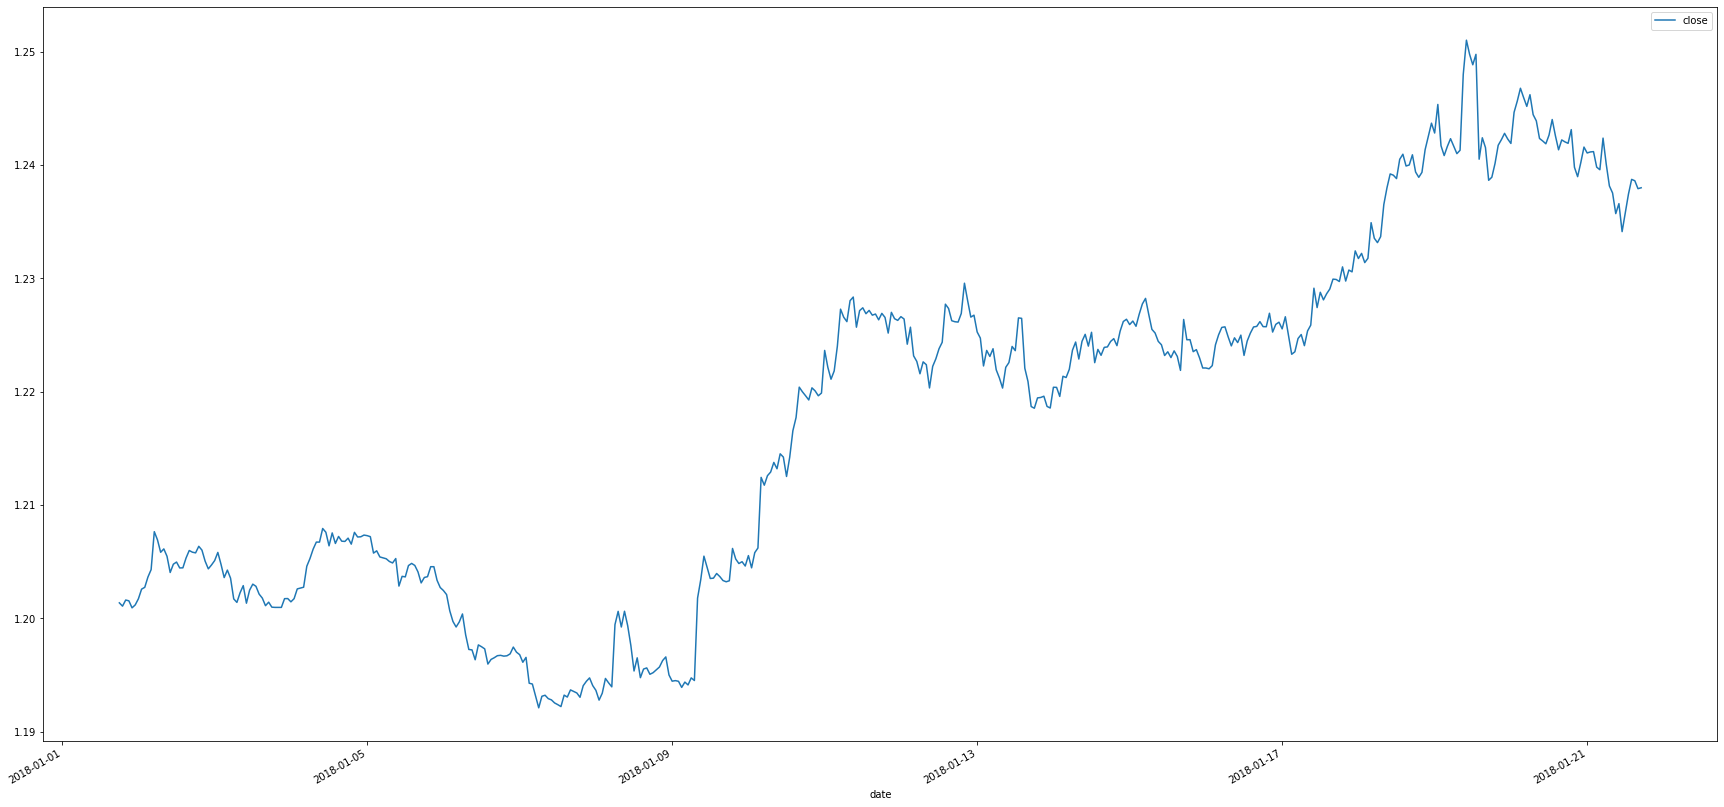

In [15]:
plot_features = df[:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [16]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

timestamp_s[:5]

58     1.514826e+09
118    1.514830e+09
178    1.514833e+09
238    1.514837e+09
298    1.514840e+09
Name: date, dtype: float64

In [17]:
df.head()

close   Day sin   Day cos  Year sin  Year cos
58   1.20136 -0.964787 -0.263031  0.018365  0.999831
118  1.20107 -0.999990 -0.004363  0.019082  0.999818
178  1.20161 -0.967046  0.254602  0.019799  0.999804
238  1.20154 -0.868199  0.496217  0.020515  0.999790
298  1.20092 -0.710185  0.704015  0.021232  0.999775

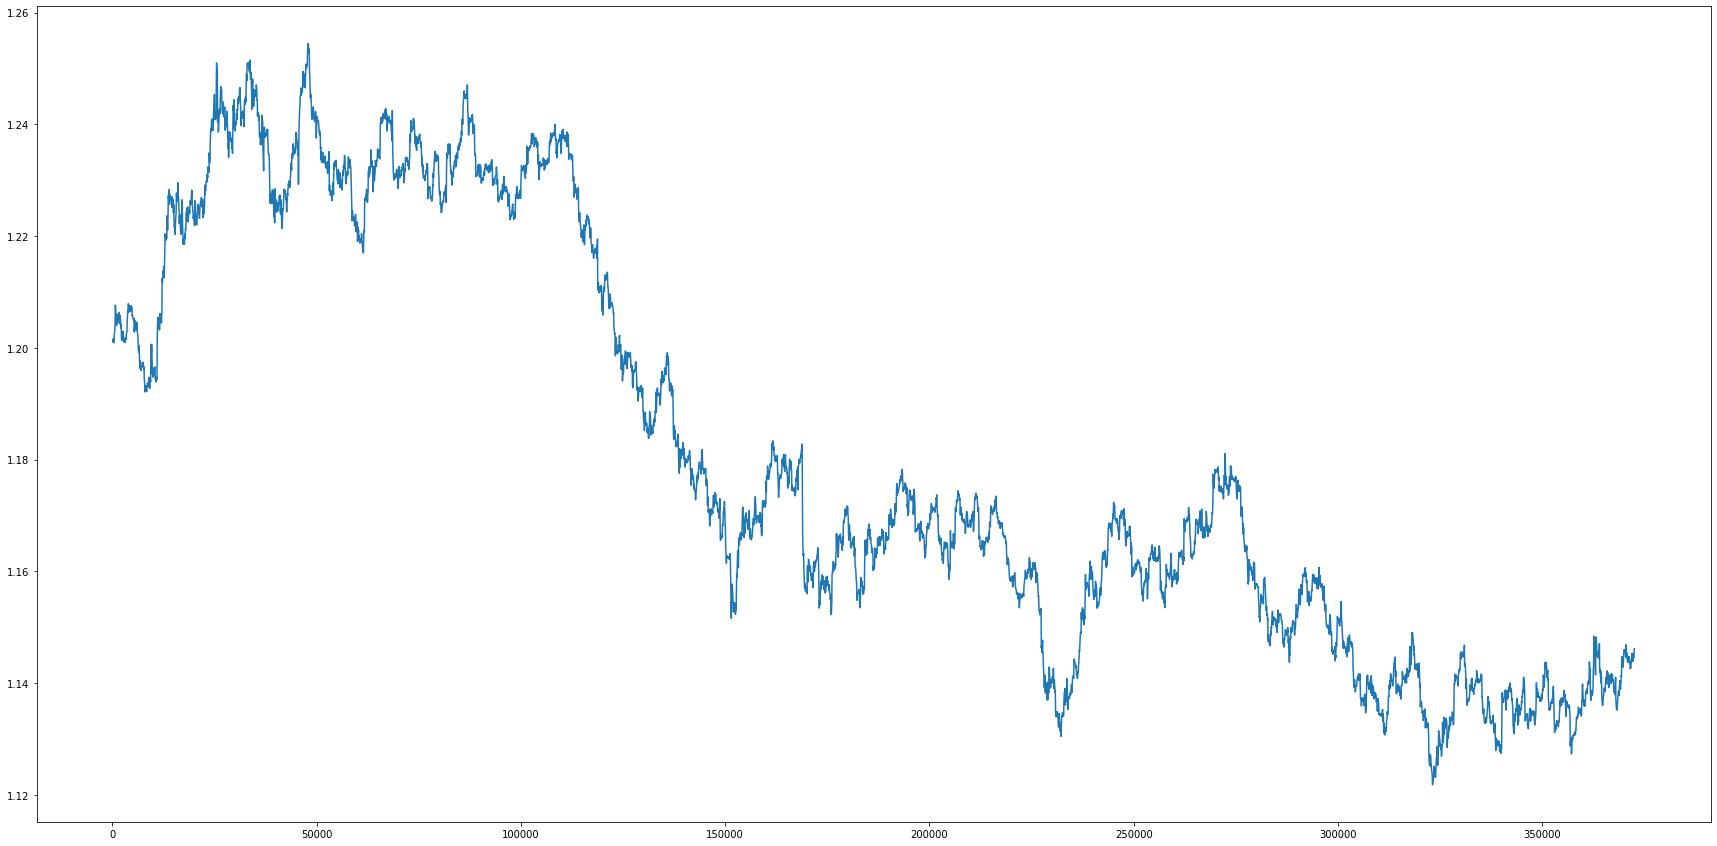

In [18]:
df[target].plot()

Text(0.5, 1.0, 'Sygnał czasu dnia')

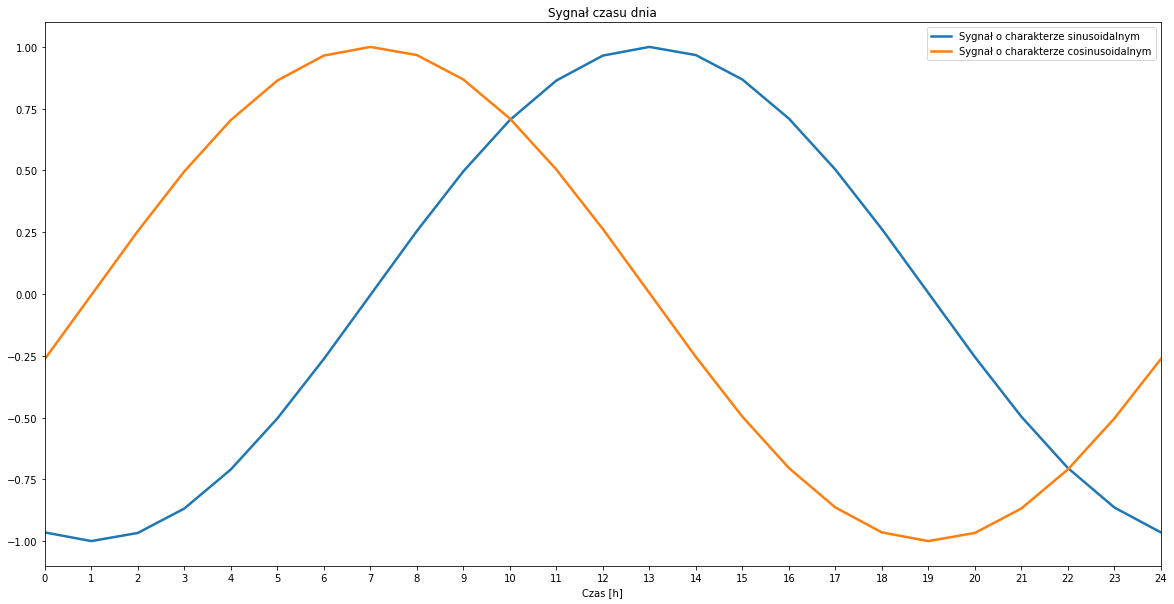

In [19]:
mpl.rcParams['figure.figsize'] = (20, 10)
plt.plot(np.array(df['Day sin'])[:25], linewidth=2.5)
plt.plot(np.array(df['Day cos'])[:25], linewidth=2.5)
plt.xlabel('Czas [h]')
plt.xlim([0, 24])
plt.xticks([i for i in range(25)])
plt.legend(["Sygnał o charakterze sinusoidalnym","Sygnał o charakterze cosinusoidalnym"])
plt.title('Sygnał czasu dnia')

In [20]:
mpl.rcParams['figure.figsize'] = (15, 8)

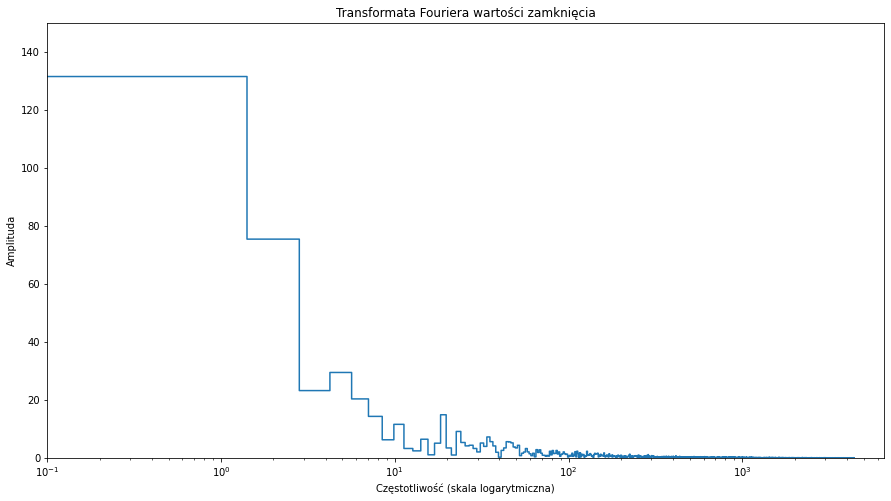

In [21]:
signal=target
fft = tf.signal.rfft(df[signal])
# fft = tf.signal.rfft(df["Day sin"])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[signal])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylabel("Amplituda")
plt.title("Transformata Fouriera wartości zamknięcia")
plt.ylim(0, 150)
plt.xlim([0.1, max(plt.xlim())])
# plt.xticks([60,1, 365.2524], labels=['1/Rok', '1/Dzień',"godzina" ])
_ = plt.xlabel('Częstotliwość (skala logarytmiczna)')

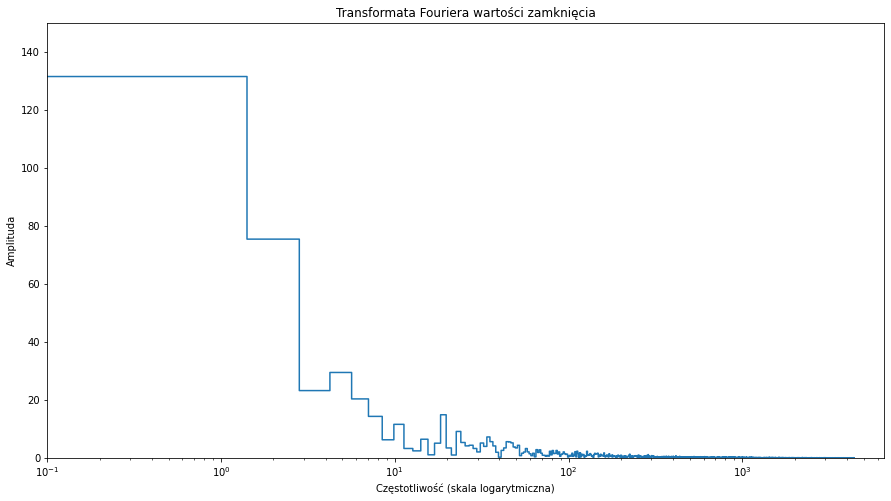

In [22]:
signal=target
fft = tf.signal.rfft(df[signal])
# fft = tf.signal.rfft(df["Day sin"])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[signal])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylabel("Amplituda")
plt.title("Transformata Fouriera wartości zamknięcia")
plt.ylim(0, 150)
plt.xlim([0.1, max(plt.xlim())])
# plt.xticks([1, 365.2524], labels=['1/Rok', '1/Dzień'])
_ = plt.xlabel('Częstotliwość (skala logarytmiczna)')

In [23]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [24]:
train_df

close   Day sin   Day cos  Year sin  Year cos
58      1.20136 -0.964787 -0.263031  0.018365  0.999831
118     1.20107 -0.999990 -0.004363  0.019082  0.999818
178     1.20161 -0.967046  0.254602  0.019799  0.999804
238     1.20154 -0.868199  0.496217  0.020515  0.999790
298     1.20092 -0.710185  0.704015  0.021232  0.999775
...         ...       ...       ...       ...       ...
260578  1.15984 -0.496217 -0.868199  0.011674 -0.999932
260638  1.15842 -0.704015 -0.710185  0.010957 -0.999940
260698  1.15928 -0.863836 -0.503774  0.010240 -0.999948
260758  1.15827 -0.964787 -0.263031  0.009524 -0.999955
260818  1.15825 -0.999990 -0.004363  0.008807 -0.999961

[4347 rows x 5 columns]

In [25]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

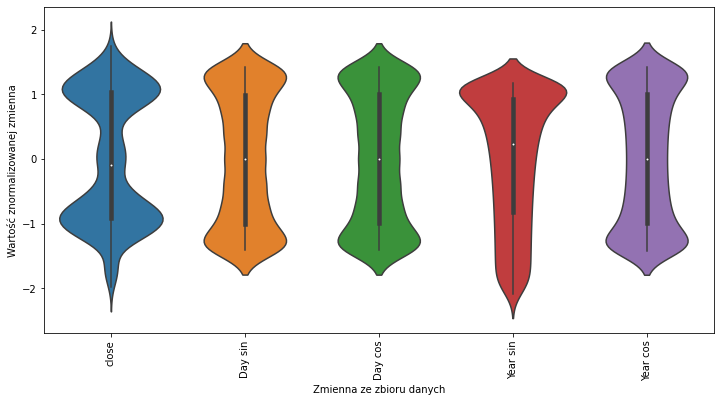

In [32]:
# df_std = (df - train_mean) / train_std
df_std = train_df.melt(var_name='Zmienna ze zbioru danych', value_name='Wartość znormalizowanej zmienna')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Zmienna ze zbioru danych', y='Wartość znormalizowanej zmienna', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

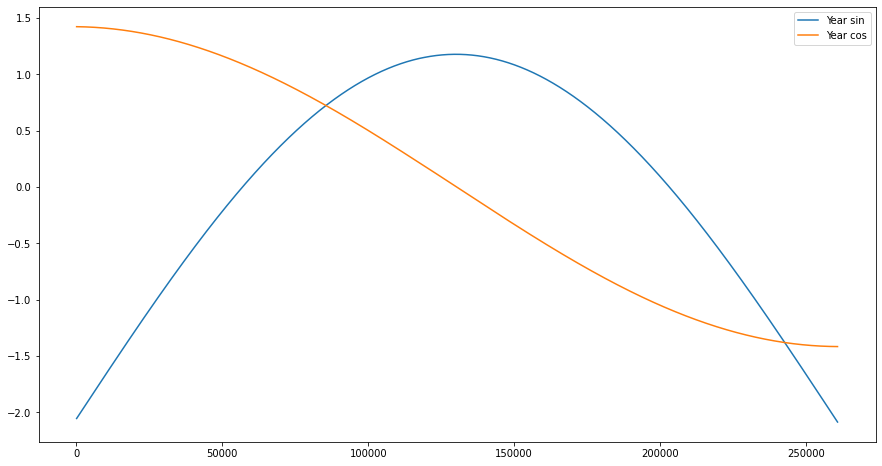

In [27]:
train_df[["Year sin", "Year cos"]].plot()

In [33]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [34]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=[target])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['close']

In [35]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=[target])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['close']

In [36]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [37]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size]),
                           np.array(train_df[500:500+w2.total_window_size]),
                           np.array(train_df[700:700+w2.total_window_size]),
                           np.array(train_df[900:900+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (6, 7, 5)
Inputs shape: (6, 6, 5)
labels shape: (6, 1, 1)


In [38]:
w2.example = example_inputs, example_labels

In [39]:
def plot(self, model=None, plot_col=target, max_subplots=6):
  inputs, labels = self.example
  # plt.figure(figsize=(15, 15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(6, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
  
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

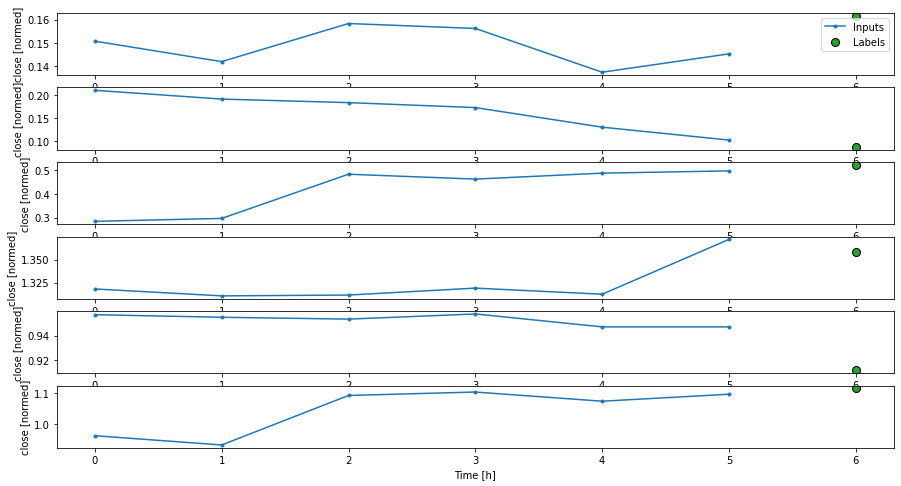

In [40]:
w2.plot()

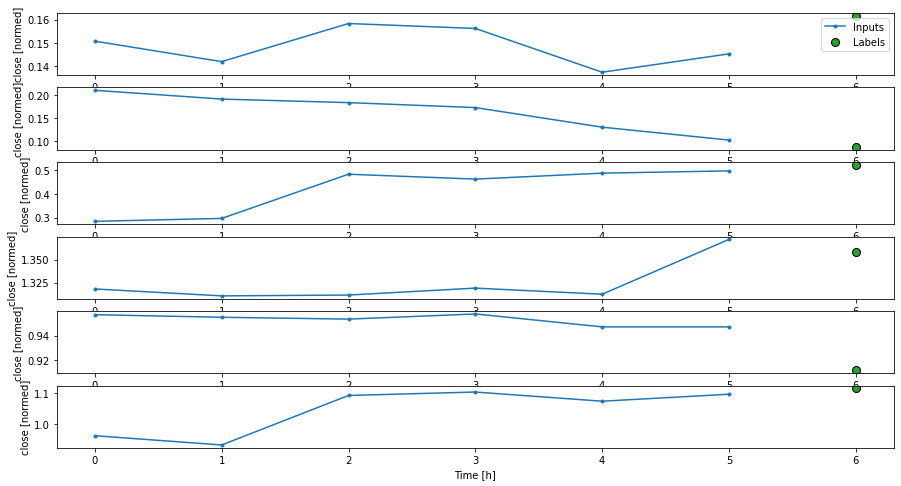

In [41]:
w2.plot(plot_col=target)

In [42]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [43]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [44]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [45]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [46]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=[target])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['close']

In [47]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [48]:
baseline = Baseline(label_index=column_indices[target])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

39/39 [==============================] - 0s 1ms/step - loss: 9.1805e-04 - mean_absolute_error: 0.0214


In [49]:
wide_window = WindowGenerator(
    input_width=36, label_width=36, shift=3,
    label_columns=[target])

wide_window

Total window size: 39
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38]
Label column name(s): ['close']

In [50]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


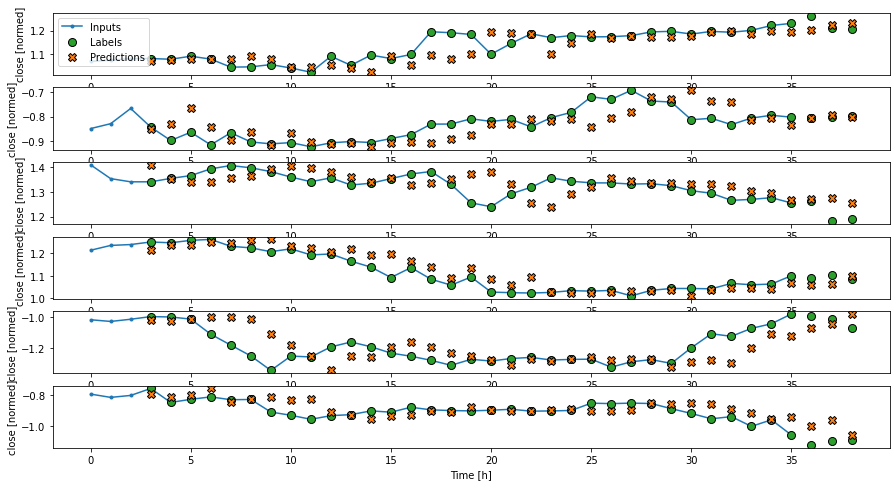

In [51]:
wide_window.plot(baseline)

In [52]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [53]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


In [54]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [55]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
136/136 [==============================] - 0s 3ms/step - loss: 0.9383 - mean_absolute_error: 0.7883 - val_loss: 3.6813 - val_mean_absolute_error: 1.7069
Epoch 2/20
136/136 [==============================] - 0s 2ms/step - loss: 0.5284 - mean_absolute_error: 0.5803 - val_loss: 1.7606 - val_mean_absolute_error: 1.1412
Epoch 3/20
136/136 [==============================] - 0s 2ms/step - loss: 0.3166 - mean_absolute_error: 0.4366 - val_loss: 0.8109 - val_mean_absolute_error: 0.7534
Epoch 4/20
136/136 [==============================] - 0s 2ms/step - loss: 0.2138 - mean_absolute_error: 0.3521 - val_loss: 0.3914 - val_mean_absolute_error: 0.5255
Epoch 5/20
136/136 [==============================] - 0s 2ms/step - loss: 0.1628 - mean_absolute_error: 0.3117 - val_loss: 0.2249 - val_mean_absolute_error: 0.4036
Epoch 6/20
136/136 [==============================] - 0s 2ms/step - loss: 0.1346 - mean_absolute_error: 0.2901 - val_loss: 0.1632 - val_mean_absolute_error: 0.3461
Epoch 7/20
136/1

In [56]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 36, 5)
Output shape: (32, 36, 1)


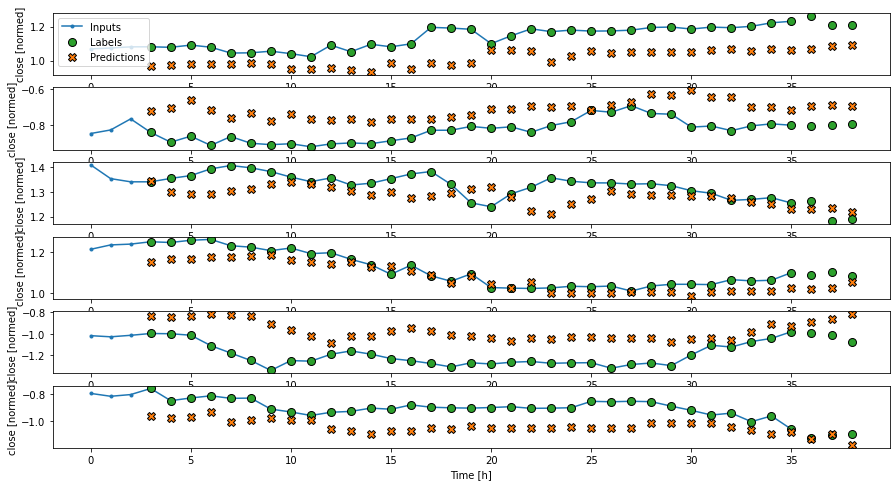

In [57]:
wide_window.plot(linear)

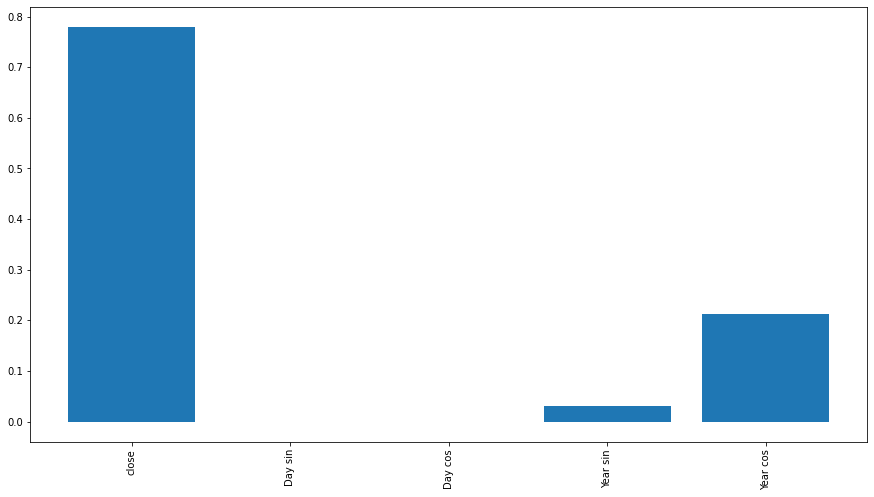

In [58]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [59]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
136/136 [==============================] - 0s 3ms/step - loss: 0.0848 - mean_absolute_error: 0.1785 - val_loss: 0.0507 - val_mean_absolute_error: 0.1827
Epoch 2/20
136/136 [==============================] - 0s 2ms/step - loss: 0.0042 - mean_absolute_error: 0.0485 - val_loss: 0.0128 - val_mean_absolute_error: 0.0902
Epoch 3/20
136/136 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0331 - val_loss: 0.0141 - val_mean_absolute_error: 0.0977
Epoch 4/20
136/136 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0305 - val_loss: 0.0097 - val_mean_absolute_error: 0.0788
Epoch 5/20
136/136 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_absolute_error: 0.0286 - val_loss: 0.0123 - val_mean_absolute_error: 0.0918
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_absolute_error: 0.0850


In [60]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=[target])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['close']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

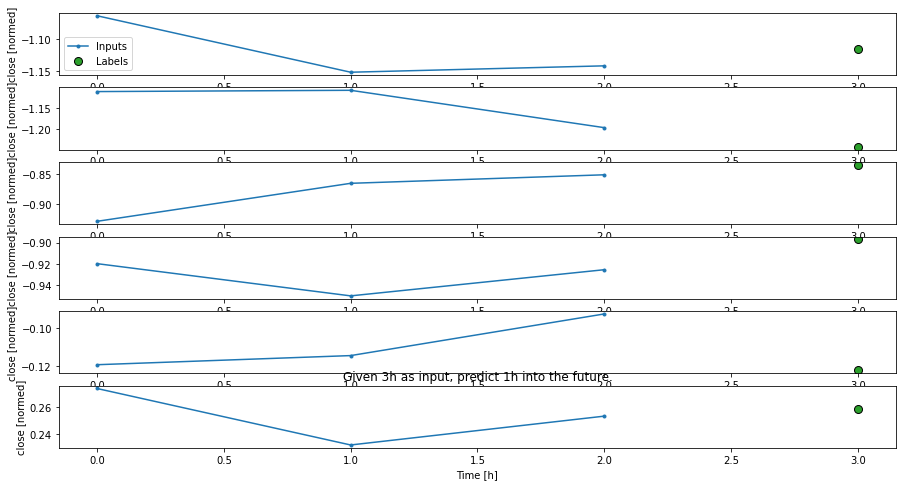

In [61]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [62]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [63]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 5)
Output shape: (32, 1, 1)


In [64]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

39/39 [==============================] - 0s 1ms/step - loss: 0.0135 - mean_absolute_error: 0.0894


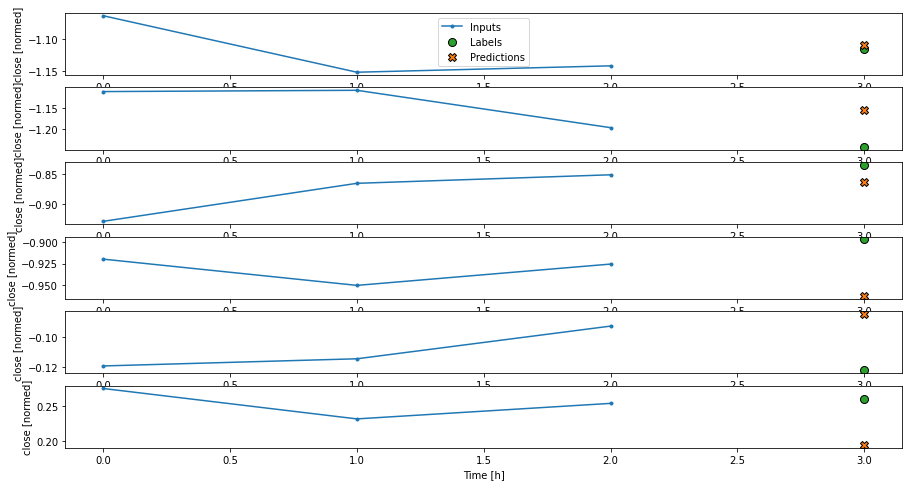

In [65]:
conv_window.plot(multi_step_dense)

In [66]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 36, 5)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,180], In[1]: [15,32] [Op:MatMul]


In [67]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [68]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 5)
Output shape: (32, 1, 1)


In [69]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

39/39 [==============================] - 0s 1ms/step - loss: 0.0154 - mean_absolute_error: 0.0976


In [70]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 36, 5)
Labels shape: (32, 36, 1)
Output shape: (32, 34, 1)


In [71]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=[target])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['close']

In [72]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 5)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


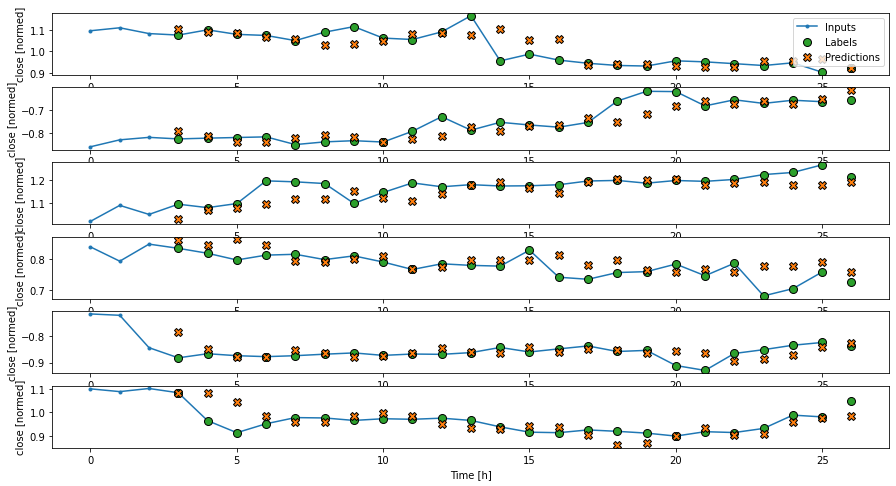

In [73]:
wide_conv_window.plot(conv_model)

In [74]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(48, return_sequences=True),
    tf.keras.layers.LSTM(48, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [75]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 36, 5)
Output shape: (32, 36, 1)


In [76]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

38/38 [==============================] - 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.1048


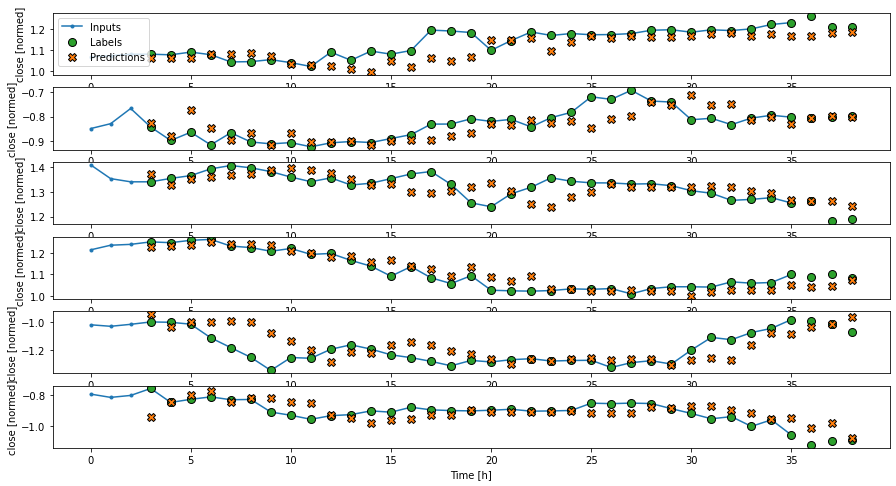

In [77]:
wide_window.plot(lstm_model)

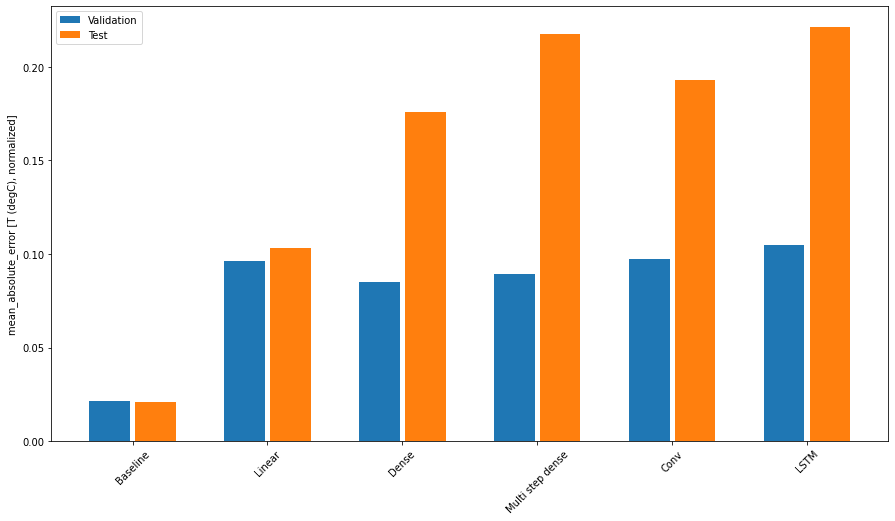

In [78]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [79]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0208
Linear      : 0.1034
Dense       : 0.1760
Multi step dense: 0.2175
Conv        : 0.1931
LSTM        : 0.2212


In [80]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 5)
Labels shape (batch, time, features): (32, 24, 5)


In [81]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [82]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

39/39 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_absolute_error: 0.0991


In [83]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [84]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

39/39 [==============================] - 0s 1ms/step - loss: 0.0179 - mean_absolute_error: 0.1092


In [85]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

39/39 [==============================] - 0s 3ms/step - loss: 0.0389 - mean_absolute_error: 0.1311

CPU times: user 57.7 s, sys: 18.8 s, total: 1min 16s
Wall time: 29.5 s


In [86]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [87]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

39/39 [==============================] - 0s 2ms/step - loss: 1.9912e-04 - mean_absolute_error: 0.0058

CPU times: user 40.9 s, sys: 13.1 s, total: 54 s
Wall time: 20.7 s


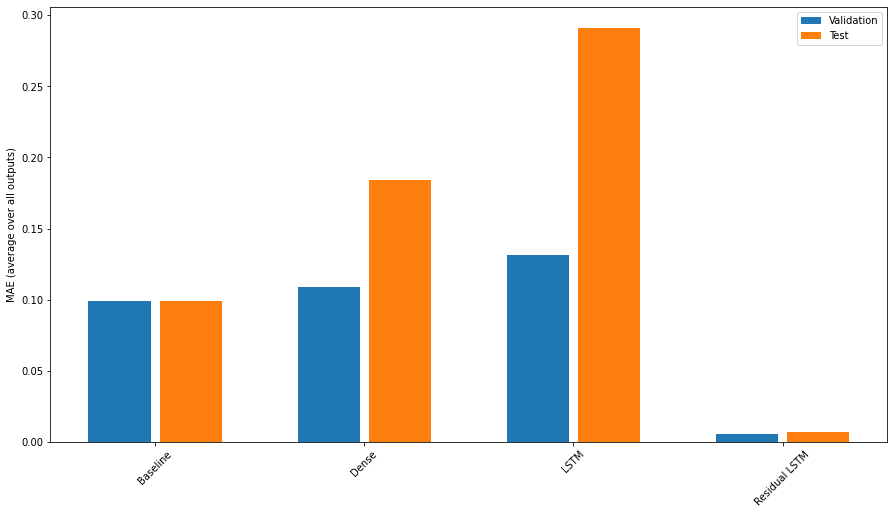

In [88]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

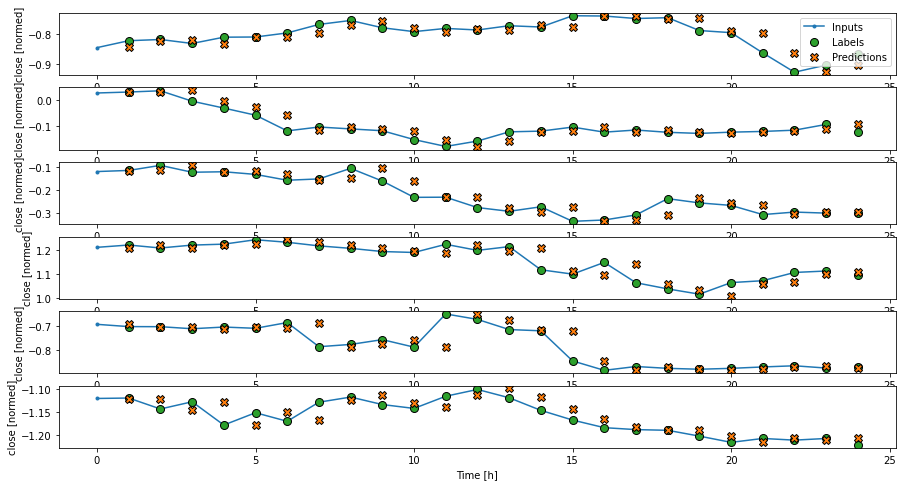

In [89]:
wide_window.plot(residual_lstm)

In [90]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.0989
Dense          : 0.1842
LSTM           : 0.2912
Residual LSTM  : 0.0068


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

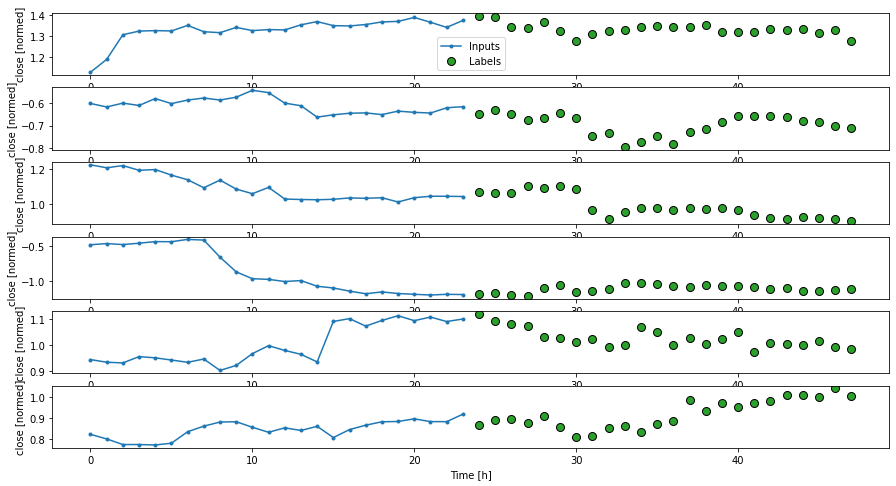

In [91]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

38/38 [==============================] - 0s 1ms/step - loss: 0.8022 - mean_absolute_error: 0.4792


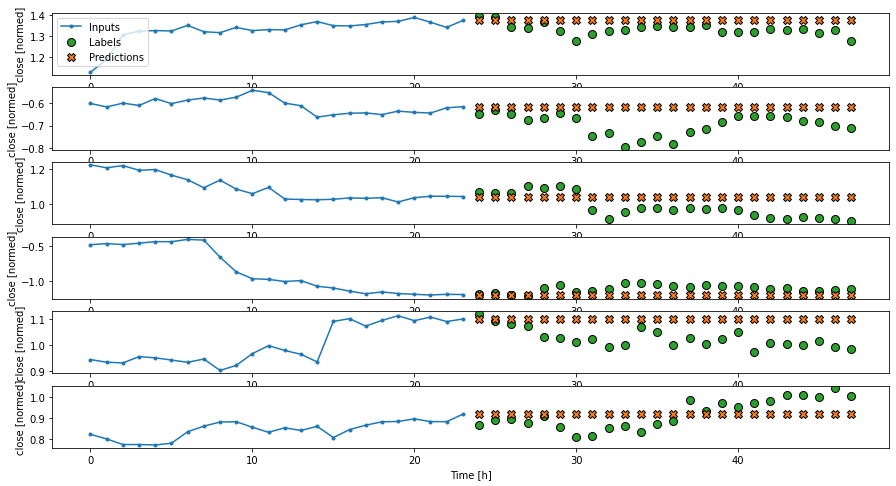

In [92]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

38/38 [==============================] - 0s 818us/step - loss: 0.0047 - mean_absolute_error: 0.0357


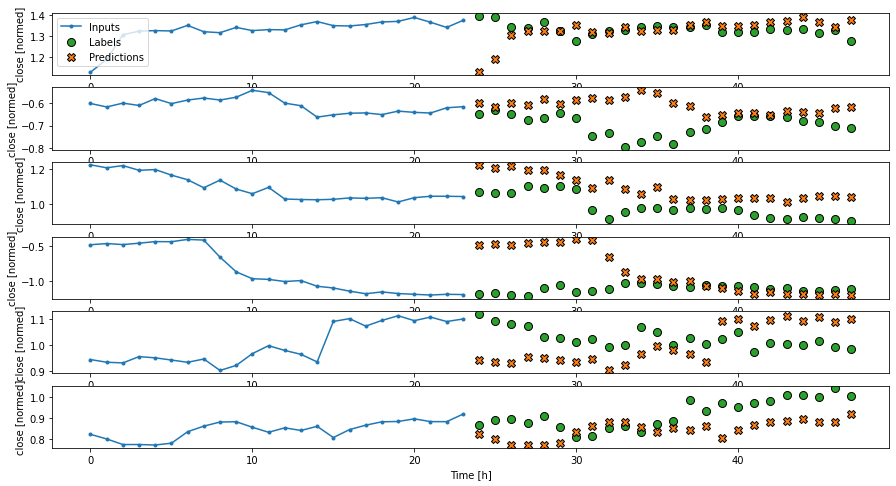

In [93]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

38/38 [==============================] - 0s 920us/step - loss: 0.0069 - mean_absolute_error: 0.0449


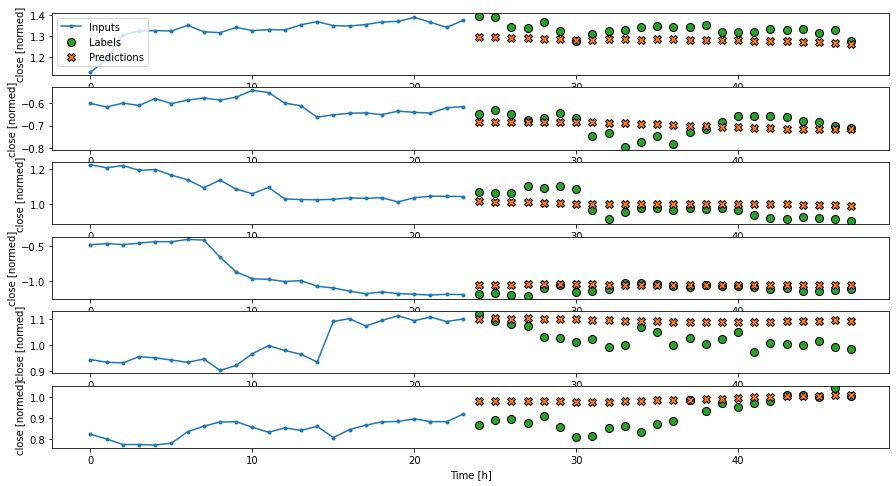

In [94]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

38/38 [==============================] - 0s 1ms/step - loss: 0.0091 - mean_absolute_error: 0.0641


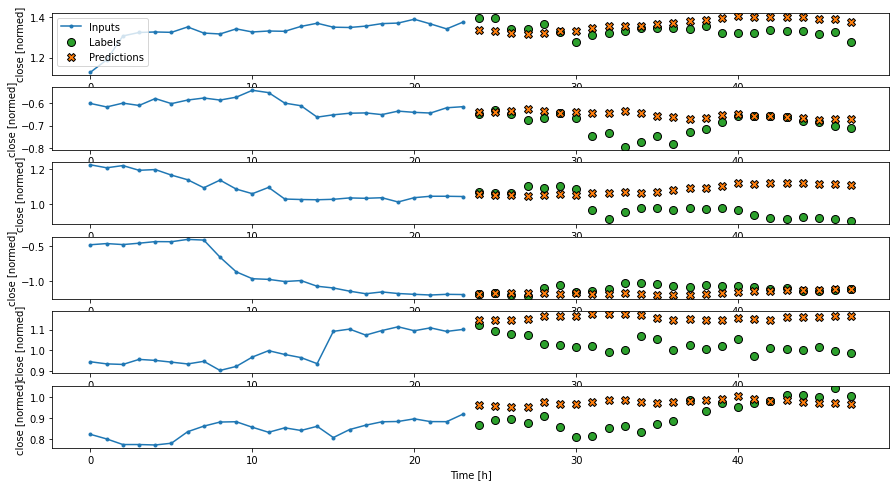

In [95]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

38/38 [==============================] - 0s 1ms/step - loss: 0.0054 - mean_absolute_error: 0.0510


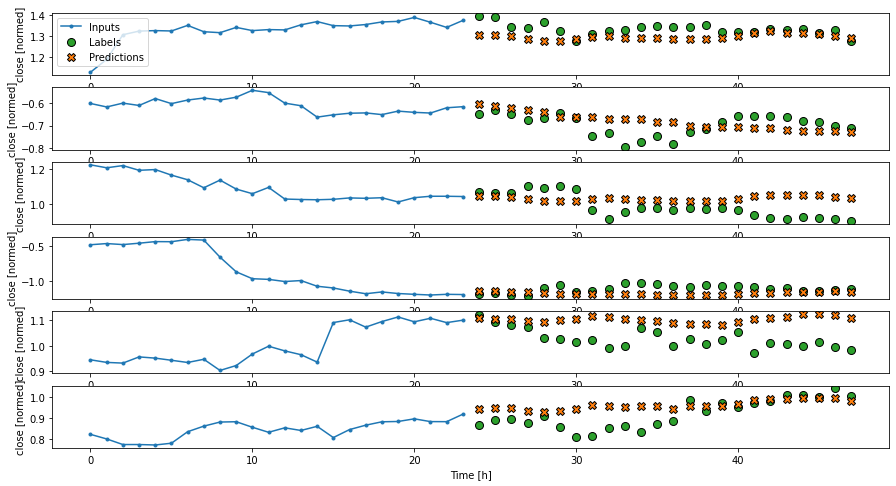

In [96]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

38/38 [==============================] - 0s 3ms/step - loss: 0.2486 - mean_absolute_error: 0.3865


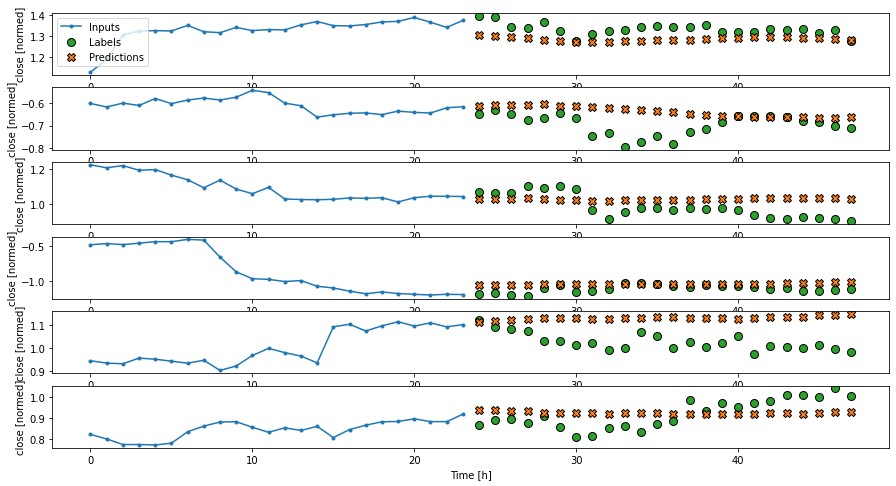

In [97]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(24, return_sequences=True),
    tf.keras.layers.LSTM(24, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.train, verbose=0)
multi_window.plot(multi_lstm_model)

In [98]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [99]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [100]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [101]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 5])

In [102]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [103]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 5)


38/38 [==============================] - 0s 3ms/step - loss: 0.4124 - mean_absolute_error: 0.4357


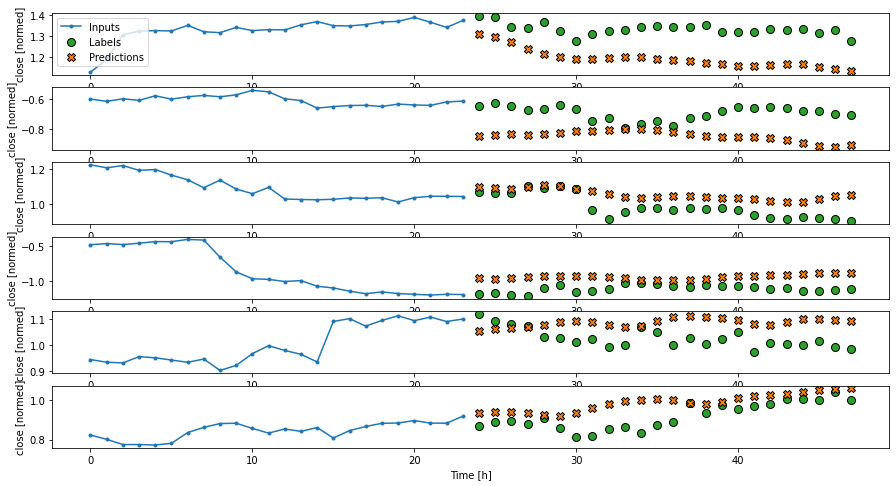

In [104]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

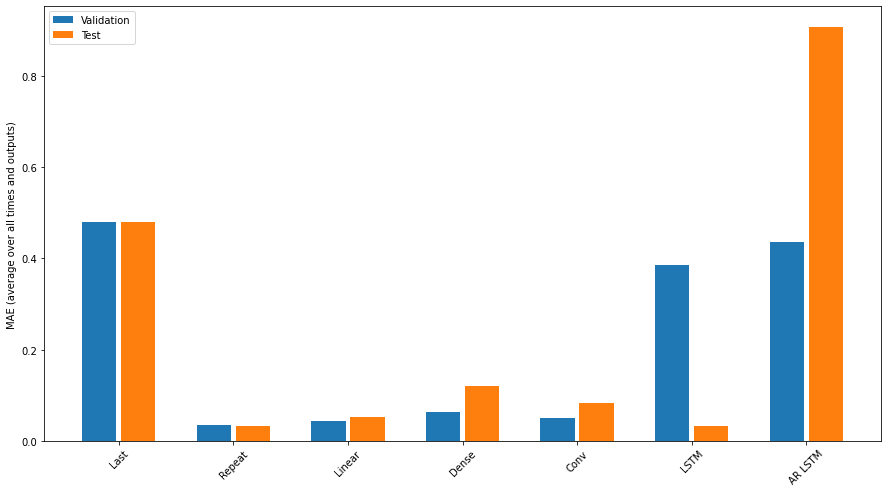

In [105]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [106]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.4792
Repeat  : 0.0322
Linear  : 0.0534
Dense   : 0.1196
Conv    : 0.0837
LSTM    : 0.0337
AR LSTM : 0.9065
